In [1]:
import pandas as pd
import numpy as np
import constants
import data_extraction
if constants.run_data_expectations:
    from expectations_helpers import (
        AutoGreatExpectations,
        view_full_suite,
        view_suite_summary,
        save_expectations,
        load_expectations,
        validate_data
    )
import preprocessing
import joblib
import prediction
from tabulate import tabulate
import runpy
import visualisations
import shap
import matplotlib.pyplot as plt

SystemError: initialization of _internal failed without raising an exception

In [2]:
import importlib
importlib.reload(prediction)
importlib.reload(visualisations)
importlib.reload(constants)
importlib.reload(data_extraction)

<module 'data_extraction' from '/Users/david@inawisdom.com/Documents/Training/premier_league/src/data_extraction.py'>

### Load Data

In [3]:
if constants.run_data_expectations:
    data_expectations = load_expectations(constants.exp_loc)

In [4]:
if constants.initial_data_load:
    full_data = data_extraction.load_all_data(
        constants.seasons_list, 
        constants.save_location,
        constants.columns_req
    )
else:
    full_data = pd.read_csv(constants.save_location)

Attempting csv 1 / 31
https://www.football-data.co.uk/mmz4281/9596/E0.csv
Attempting csv 2 / 31
https://www.football-data.co.uk/mmz4281/9697/E0.csv
Attempting csv 3 / 31
https://www.football-data.co.uk/mmz4281/9798/E0.csv
Attempting csv 4 / 31
https://www.football-data.co.uk/mmz4281/9899/E0.csv
Attempting csv 5 / 31
https://www.football-data.co.uk/mmz4281/0001/E0.csv
Attempting csv 6 / 31
https://www.football-data.co.uk/mmz4281/0102/E0.csv
Attempting csv 7 / 31
https://www.football-data.co.uk/mmz4281/0203/E0.csv
Attempting csv 8 / 31
https://www.football-data.co.uk/mmz4281/0304/E0.csv
Attempting csv 9 / 31
https://www.football-data.co.uk/mmz4281/0405/E0.csv
Attempting csv 10 / 31
https://www.football-data.co.uk/mmz4281/0506/E0.csv
Attempting csv 11 / 31
https://www.football-data.co.uk/mmz4281/0607/E0.csv
Attempting csv 12 / 31
https://www.football-data.co.uk/mmz4281/0708/E0.csv
Attempting csv 13 / 31
https://www.football-data.co.uk/mmz4281/0809/E0.csv
Attempting csv 14 / 31
https://www

In [5]:
full_data = data_extraction.add_new_data(
    full_data, 
    constants.columns_req,
    constants.training_data_location
)

Data saved at ../data/training_data_full.csv


In [6]:
full_data = data_extraction.get_fixtures(full_data)

In [7]:
if constants.run_data_expectations:
    validation_results = validate_data(full_data, data_expectations)

### Preprocessing

In [8]:
transformers = joblib.load(constants.transformer_path)

In [9]:
transformed_data = preprocessing.transform_data(
    full_data, transformers
)

### Make FTR Predictions

In [10]:
classifier = joblib.load(constants.class_model_name)

In [11]:
predictions = prediction.predict(transformed_data, classifier)

In [12]:
transformed_data['match_prediction'] = predictions

In [41]:
transformed_data[transformed_data['MW'] == 13].tail()

,season,HomeTeam,AwayTeam,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,MW,HTFormPts,ATFormPts,HTGD,ATGD,DiffPts,DiffFormPts,HomeLeaguePosition,AwayLeaguePosition,LeaguePositionDiff,MatchDayDay,MatchDayMonth,MatchDayDate,match_prediction,Home Prediction,Away Prediction,Result Prediction
10385,2023-24,Man United,Brentford,2,11.0,16.0,16.0,12.0,1.307692,1.153846,D,D,D,D,L,W,W,W,W,L,13.0,8,8,-0.384615,0.307692,0.153846,0.000000,6,8,-2,Saturday,October,7,0,1,1,D
10386,2023-24,Crystal Palace,Nott'm Forest,2,8.0,10.0,13.0,15.0,1.076923,0.923077,D,D,D,D,L,L,L,D,D,D,13.0,3,4,-0.384615,-0.384615,0.153846,-0.076923,10,13,-3,Saturday,October,7,0,1,1,D
10387,2023-24,Brighton,Liverpool,2,23.0,23.0,19.0,9.0,1.461538,1.923077,D,D,D,D,D,W,L,W,D,D,13.0,4,9,0.307692,1.076923,-0.461538,-0.384615,4,2,2,Sunday,October,8,1,1,1,D
10388,2023-24,West Ham,Newcastle,2,16.0,26.0,17.0,11.0,1.230769,1.461538,D,D,D,D,L,D,L,W,D,D,13.0,3,7,-0.076923,1.153846,-0.230769,-0.307692,7,5,2,Sunday,October,8,1,1,1,D
10389,2023-24,Wolves,Aston Villa,2,13.0,26.0,17.0,14.0,1.076923,1.846154,D,D,D,D,D,W,W,W,D,D,13.0,7,9,-0.307692,0.923077,-0.769231,-0.153846,11,3,8,Sunday,October,8,1,1,1,D


### Home Goals

In [14]:
regressor_1 = joblib.load(constants.home_model_name)

In [15]:
predictions_1 = prediction.predict(transformed_data, regressor_1)

In [16]:
predictions_1[0:5]

array([1, 1, 1, 2, 2])

### Away Goals

In [17]:
regressor_2 = joblib.load(constants.away_model_name)

In [18]:
predictions_2 = prediction.predict(transformed_data, regressor_2)

In [19]:
predictions_2[0:10]

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0])

### Extract Current round of fixtures

In [20]:
transformed_data[transformed_data['HomeTeam'] == 'Brighton'].tail()

,season,HomeTeam,AwayTeam,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,MW,HTFormPts,ATFormPts,HTGD,ATGD,DiffPts,DiffFormPts,HomeLeaguePosition,AwayLeaguePosition,LeaguePositionDiff,MatchDayDay,MatchDayMonth,MatchDayDate,match_prediction
10592,2023-24,Brighton,Man City,2,23.0,22.0,19.0,7.0,1.176471,1.382353,D,D,D,D,D,D,D,D,D,D,34.0,5,5,0.117647,0.441176,-0.205882,0.0,6,3,3,Saturday,March,16,1
10622,2023-24,Brighton,Arsenal,2,23.0,23.0,19.0,8.0,1.162162,1.351351,D,D,D,D,D,D,D,D,D,D,37.0,5,5,0.108108,0.405405,-0.189189,0.0,6,2,4,Saturday,April,6,1
10642,2023-24,Brighton,Chelsea,2,23.0,13.0,19.0,11.0,1.153846,1.025641,D,D,D,D,D,D,D,D,D,D,39.0,5,5,0.102564,0.051282,0.128205,0.0,5,12,-7,Saturday,April,20,1
10663,2023-24,Brighton,Aston Villa,2,23.0,26.0,19.0,14.0,1.146341,1.268293,D,D,D,D,D,D,D,D,D,D,41.0,5,5,0.097561,0.292683,-0.121951,0.0,6,5,1,Saturday,May,4,1
10683,2023-24,Brighton,Man United,2,23.0,11.0,19.0,16.0,1.139535,1.093023,D,D,D,D,D,D,D,D,D,D,43.0,5,5,0.093023,-0.116279,0.046512,0.0,5,7,-2,Sunday,May,19,2


In [21]:
results = visualisations.extract_last_results('Brighton', transformed_data)

Brighton
╒════════════════╕
│ Last 5 Games   │
╞════════════════╡
│ L              │
├────────────────┤
│ W              │
├────────────────┤
│ L              │
├────────────────┤
│ W              │
├────────────────┤
│ L              │
╘════════════════╛


In [22]:
transformed_data['Home Prediction'] = predictions_1
transformed_data['Away Prediction'] = predictions_2
transformed_data['Result Prediction'] = transformed_data.apply(
    prediction.add_res_prediction, axis = 1)     
transformed_data.to_csv('../data/transformed_data_predictions.csv', index=False)

In [23]:
transformed_data['Result Prediction'].value_counts()

H    5479
D    2930
A    2282
Name: Result Prediction, dtype: int64

In [24]:
transformed_data.head(2)

,season,HomeTeam,AwayTeam,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,MW,HTFormPts,ATFormPts,HTGD,ATGD,DiffPts,DiffFormPts,HomeLeaguePosition,AwayLeaguePosition,LeaguePositionDiff,MatchDayDay,MatchDayMonth,MatchDayDate,match_prediction,Home Prediction,Away Prediction,Result Prediction
0,1995-96,Aston Villa,Man United,0,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,1.0,0,0,0.0,0.0,0.0,0.0,2,11,-9,Saturday,August,19,2,1,1,D
1,1995-96,Blackburn,QPR,0,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,1.0,0,0,0.0,0.0,0.0,0.0,3,15,-12,Saturday,August,19,0,1,0,H


In [25]:
current_fixtures = data_extraction.extract_current_fixtures(
    transformed_data
)
current_fixtures.head()

,season,HomeTeam,AwayTeam,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,MW,HTFormPts,ATFormPts,HTGD,ATGD,DiffPts,DiffFormPts,HomeLeaguePosition,AwayLeaguePosition,LeaguePositionDiff,MatchDayDay,MatchDayMonth,MatchDayDate,match_prediction,Home Prediction,Away Prediction,Result Prediction,Match Number,Round Number,Date,Location,Fixture Date,Fixture Time,Fixture
102,2023-24,Brentford,West Ham,2,16.0,16.0,12.0,17.0,1.1250,1.1875,D,D,D,D,D,D,D,D,D,D,16.0,5,5,0.2500,-0.0625,-0.0625,0.0,9,8,1,Saturday,November,4,0,1,1,D,101,11,04/11/2023 15:00,Gtech Community Stadium,2023-11-04,16:00,Brentford v West Ham
103,2023-24,Burnley,Crystal Palace,2,8.0,8.0,25.0,13.0,0.5625,1.0625,D,D,D,D,D,D,D,D,D,D,16.0,5,5,-1.0625,-0.3125,-0.5000,0.0,17,11,6,Saturday,November,4,0,1,1,D,102,11,04/11/2023 15:00,Turf Moor,2023-11-04,16:00,Burnley v Crystal Palace
104,2023-24,Everton,Brighton,2,10.0,23.0,14.0,19.0,0.9375,1.3750,D,D,D,D,D,D,D,D,D,D,16.0,5,5,-0.2500,0.2500,-0.4375,0.0,14,5,9,Saturday,November,4,0,1,1,D,103,11,04/11/2023 15:00,Goodison Park,2023-11-04,16:00,Everton v Brighton
105,2023-24,Fulham,Man United,2,9.0,11.0,16.0,16.0,1.0625,1.2500,D,D,D,D,D,D,D,D,D,D,16.0,5,5,-0.4375,-0.3125,-0.1875,0.0,10,7,3,Saturday,November,4,1,1,1,D,104,11,04/11/2023 15:00,Craven Cottage,2023-11-04,16:00,Fulham v Man United
106,2023-24,Luton,Liverpool,2,9.0,23.0,20.0,9.0,0.6250,1.7500,D,D,D,D,D,D,D,D,D,D,16.0,5,5,-0.6875,0.8750,-1.1250,0.0,16,3,13,Saturday,November,4,2,1,1,D,105,11,04/11/2023 15:00,Kenilworth Road,2023-11-04,16:00,Luton v Liverpool


### Visualisations

In [26]:
table = current_fixtures[['Fixture Date', 'Fixture Time', 'Location', 'HomeTeam', 'AwayTeam', 
                  'Home Prediction', 'Away Prediction' ,'Result Prediction']].reset_index(drop=True)
print(tabulate(table, tablefmt='fancy_grid', headers='keys'))

╒════╤═════════════════════╤════════════════╤═══════════════════════════╤══════════════════╤════════════════╤═══════════════════╤═══════════════════╤═════════════════════╕
│    │ Fixture Date        │ Fixture Time   │ Location                  │ HomeTeam         │ AwayTeam       │   Home Prediction │   Away Prediction │ Result Prediction   │
╞════╪═════════════════════╪════════════════╪═══════════════════════════╪══════════════════╪════════════════╪═══════════════════╪═══════════════════╪═════════════════════╡
│  0 │ 2023-11-04 00:00:00 │ 16:00          │ Gtech Community Stadium   │ Brentford        │ West Ham       │                 1 │                 1 │ D                   │
├────┼─────────────────────┼────────────────┼───────────────────────────┼──────────────────┼────────────────┼───────────────────┼───────────────────┼─────────────────────┤
│  1 │ 2023-11-04 00:00:00 │ 16:00          │ Turf Moor                 │ Burnley          │ Crystal Palace │                 1 │           

In [27]:
table = current_fixtures[['HomeTeam', 'AwayTeam', 
                  'Home Prediction', 'Away Prediction']].reset_index(drop=True)
table.index = table.index + 1
print(tabulate(table, tablefmt='fancy_grid', headers='keys'))

╒════╤══════════════════╤════════════════╤═══════════════════╤═══════════════════╕
│    │ HomeTeam         │ AwayTeam       │   Home Prediction │   Away Prediction │
╞════╪══════════════════╪════════════════╪═══════════════════╪═══════════════════╡
│  1 │ Brentford        │ West Ham       │                 1 │                 1 │
├────┼──────────────────┼────────────────┼───────────────────┼───────────────────┤
│  2 │ Burnley          │ Crystal Palace │                 1 │                 1 │
├────┼──────────────────┼────────────────┼───────────────────┼───────────────────┤
│  3 │ Everton          │ Brighton       │                 1 │                 1 │
├────┼──────────────────┼────────────────┼───────────────────┼───────────────────┤
│  4 │ Fulham           │ Man United     │                 1 │                 1 │
├────┼──────────────────┼────────────────┼───────────────────┼───────────────────┤
│  5 │ Luton            │ Liverpool      │                 1 │                 1 │
├───

In [28]:
# Example of extract last 5
#importlib.reload(visualisations)
results = visualisations.extract_last_results( 'Arsenal', transformed_data)

Arsenal
╒════════════════╕
│ Last 5 Games   │
╞════════════════╡
│ W              │
├────────────────┤
│ W              │
├────────────────┤
│ L              │
├────────────────┤
│ W              │
├────────────────┤
│ L              │
╘════════════════╛


In [29]:
classifier

In [30]:
# Shap values
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(transformed_data[classifier.feature_names_])

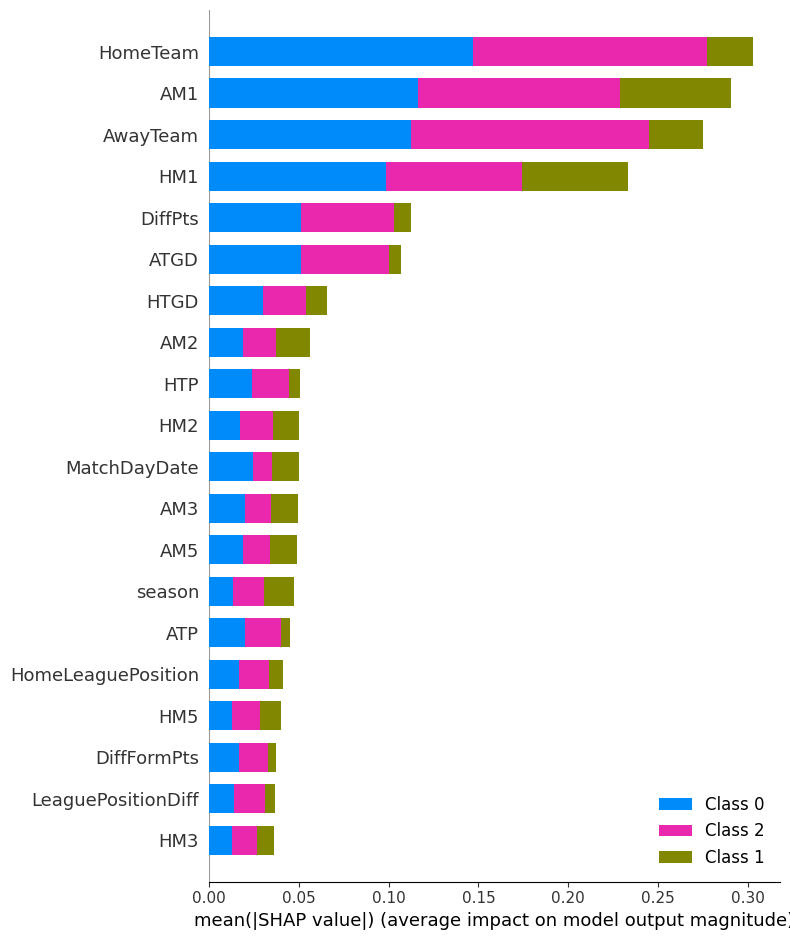

In [31]:
shap.summary_plot(
        shap_values, 
        transformed_data[classifier.feature_names_],
        plot_type="bar"
)

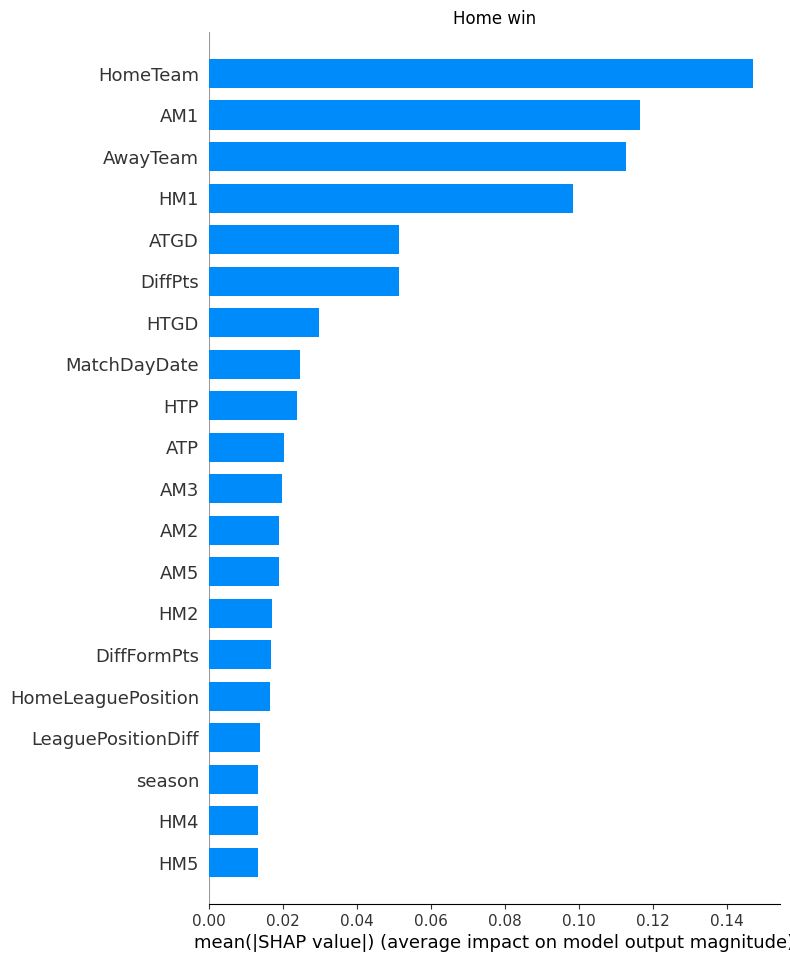

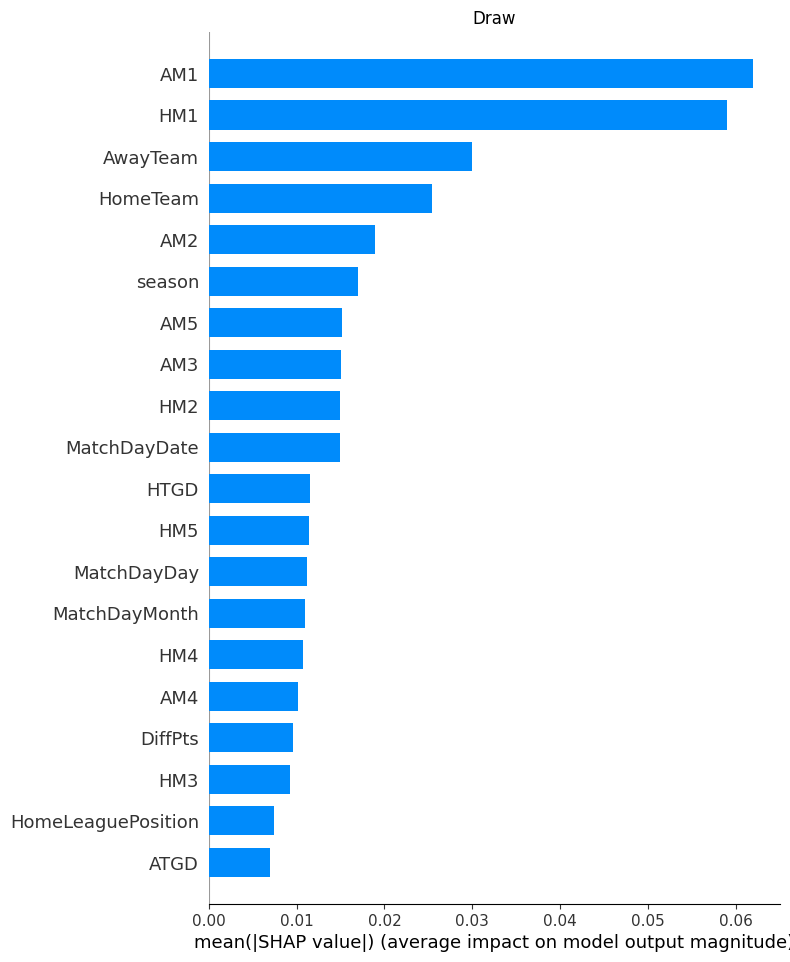

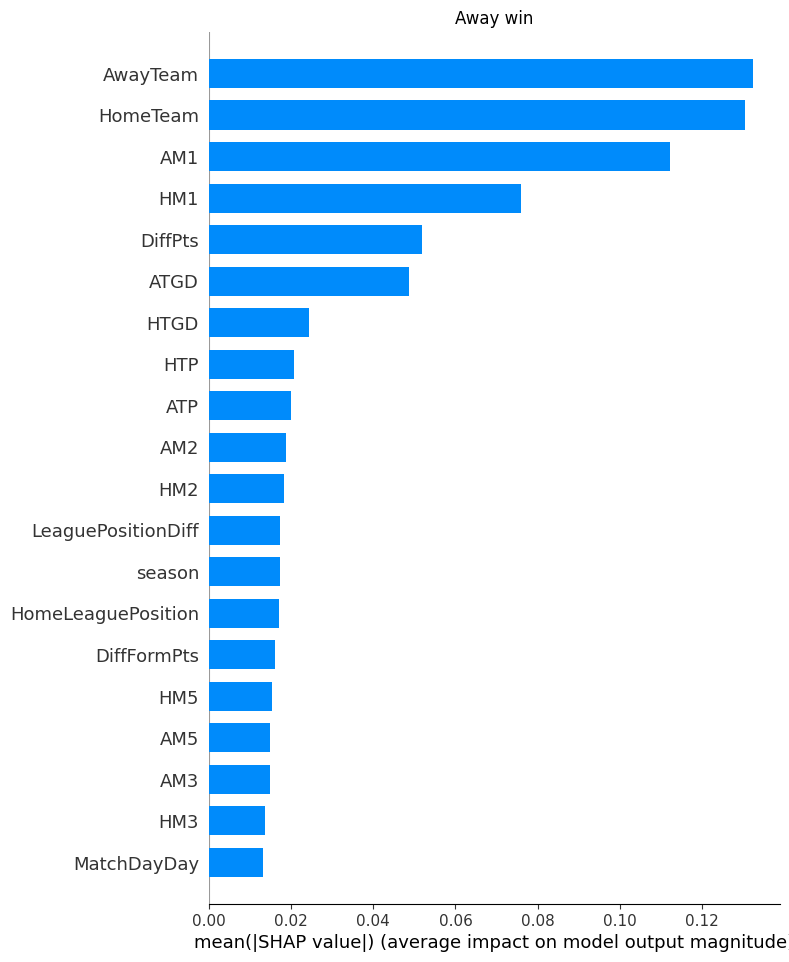

In [32]:
class_names = ['Home win', 'Draw', 'Away win']
# Loop through each class and create a summary plot
for i in range(len(shap_values)):
    shap.summary_plot(
        shap_values[i], 
        transformed_data[classifier.feature_names_], 
        show=False,
        plot_type='bar'
    )
    plt.title(class_names[i])
    plt.show()

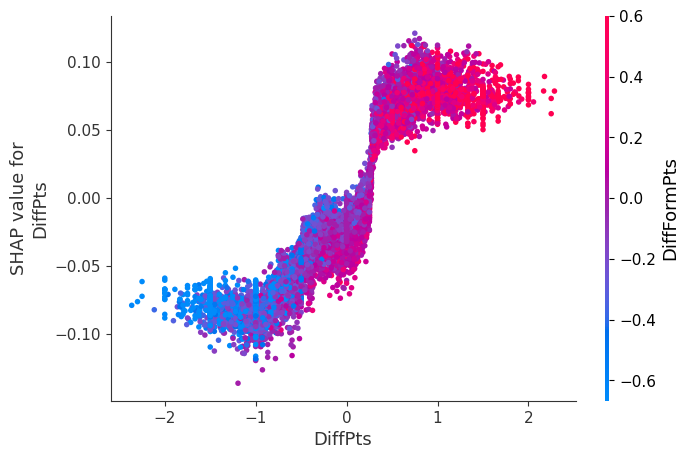

In [33]:
shap.dependence_plot(
    'DiffPts', 
    shap_values[0], 
    transformed_data[classifier.feature_names_]
)

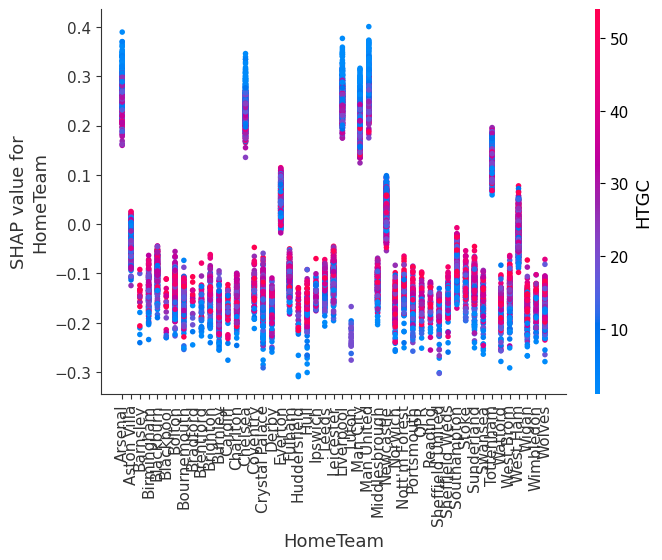

In [34]:
shap.dependence_plot(
    'HomeTeam', 
    shap_values[0], 
    transformed_data[classifier.feature_names_]
)

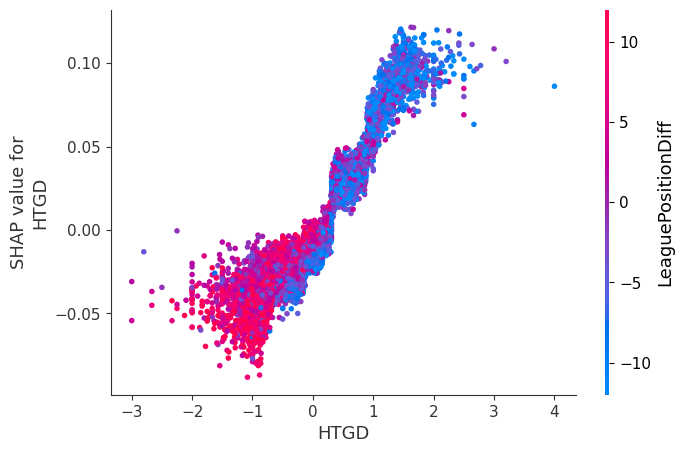

In [35]:
shap.dependence_plot(
    'HTGD', 
    shap_values[0], 
    transformed_data[classifier.feature_names_]
)

### Unit tests

In [36]:
# Run unit tests
test_path = '/Users/david@inawisdom.com/Documents/Training/premier_league/tests/run_tests.py'
r = runpy.run_path(test_path)

============================= test session starts ==============================
platform darwin -- Python 3.8.10, pytest-5.4.3, py-1.11.0, pluggy-0.13.1
rootdir: /Users/david@inawisdom.com/Documents/Training/premier_league
plugins: mock-3.11.1, requests-mock-1.11.0, cov-4.0.0, anyio-3.6.2, Faker-17.6.0
collected 8 items

../tests/test_preprocessing_helpers.py ........                          [100%]

============================== 8 passed in 0.10s ===============================
